<a href="https://colab.research.google.com/github/manan152003/dphi-colab/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Image Processing

In [ ]:
!pip install opencv-python

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car.jpg to car (1).jpg


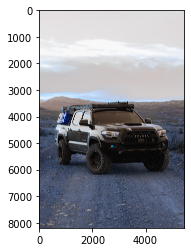

In [ ]:
img = cv.imread("car.jpg")
plt.imshow(img)

In [ ]:
# This is a 3-d array of pixel color info, in BGR format
print(img)
print("Image properties")
print("Number of Pixels - " + str(img.size))
print("Shape/Dimensions - " + str(img.shape))


[[[231 230 234]
  [232 231 235]
  [232 231 235]
  ...
  [228 238 248]
  [228 238 248]
  [228 238 248]]

 [[230 229 233]
  [231 230 234]
  [232 231 235]
  ...
  [228 238 248]
  [228 238 248]
  [228 238 248]]

 [[229 228 232]
  [230 229 233]
  [231 230 234]
  ...
  [228 238 248]
  [228 238 248]
  [228 238 248]]

 ...

 [[ 71  83 111]
  [ 67  79 107]
  [ 66  78 106]
  ...
  [ 91 101 125]
  [ 88  98 122]
  [ 83  93 117]]

 [[ 70  82 110]
  [ 68  80 108]
  [ 68  80 108]
  ...
  [ 90  97 122]
  [ 89  96 121]
  [ 86  93 118]]

 [[ 73  85 113]
  [ 73  85 113]
  [ 75  87 115]
  ...
  [ 84  91 116]
  [ 86  93 118]
  [ 89  96 121]]]
Image properties
Number of Pixels - 134283264
Shape/Dimensions - (8192, 5464, 3)


## Colors changing

1. change *blue to red* and *red to blue*
2. change to grayscale



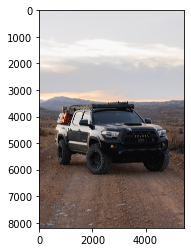

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

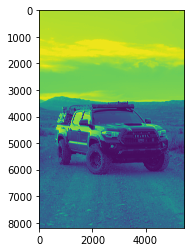

In [ ]:
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(gray_img)

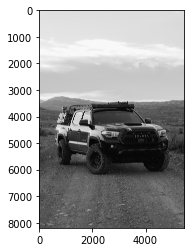

In [ ]:
# have to convert grayscale back to RGB for plt.imshow(), since plt.imshow expects a 3d array
plt.imshow(cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB))

In [ ]:
# grayscale image represented as a 2-d array, no need of BGR colour channels
print(gray_img)
print("Image properties")
print("Number of Pixels - " + str(img.size))
print("Shape/Dimensions - " + str(img.shape))

[[231 232 232 ... 240 240 240]
 [230 231 232 ... 240 240 240]
 [229 230 231 ... 240 240 240]
 ...
 [ 90  86  85 ... 107 104  99]
 [ 89  87  87 ... 104 103 100]
 [ 92  92  94 ...  98 100 103]]
Image properties
Number of Pixels - 134283264
Shape/Dimensions - (8192, 5464, 3)


## Let's find the mean/average colour of the image

---



In [ ]:
# finding  the average per row of img
# np.average() takes in an axis argument which finds the average across that axis.(axis=0)
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[143 134 132]


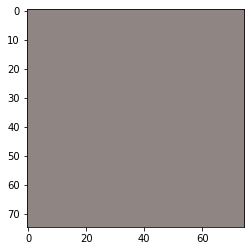

In [ ]:
# create 75 x 75 pixel array with average color value
average_color_img = np.array([[average_color]*75]*75, np.uint8)

plt.imshow(average_color_img)

## Image Gradient
Let's look at another image and perform some basic operations like gradient operaton


> An image gradient is a directional change in the intensity or color in an image.




In [ ]:
from google.colab import files
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://upload.wikimedia.org/wikipedia/commons/1/14/Brad_Pitt_%2815570818296%29.jpg

Saving brad.jpg to brad (1).jpg


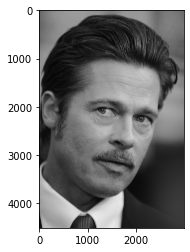

In [ ]:
#Read Image in GrayScale by setting 0 in the arguments
img_gray = cv.imread("brad.jpg", 0)
plt.imshow(cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR))

In [ ]:
# assigning height and width from img_gray.shape
h,w = img_gray.shape[:2]
print(h,w)

4504 2988


In [ ]:
grad_img = np.asarray(img_gray)
print(grad_img)

[[ 97  97  97 ... 100 104 106]
 [ 98 100 102 ... 101 104 106]
 [ 97  99 100 ... 104 104 103]
 ...
 [ 13  13  14 ...  52  52  52]
 [ 13  13  13 ...  53  53  52]
 [ 14  15  14 ...  53  53  51]]


In [ ]:
#applying gradient - subtracting the next pixel from the current pixel
for i in range(0,h):
  for j in range(0,w-1):
    min_pix_val = min(img_gray[i][j+1], img_gray[i][j])
    if min_pix_val == img_gray[i][j+1]:
      temp_arr = img_gray[i][j] - img_gray[i][j+1]
    else:
      temp_arr = img_gray[i][j+1] - img_gray[i][j]  
    grad_img[i,j] = temp_arr
    

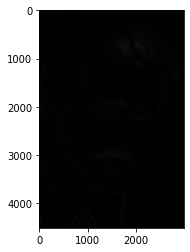

In [ ]:
#we can use pillow package
from PIL import Image
gradient_img = Image.fromarray(grad_img)
# Cmap='gray' -> converts to gray scale directly
plt.imshow(gradient_img, cmap='gray')

## Negatives

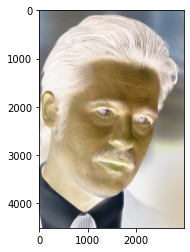

In [ ]:
img = cv.imread("brad.jpg")
B,G,R = cv.split(img) 
B[:] = [255-x for x in B]
G[:] = [255-x for x in G]
R[:] = [255-x for x in R]

neg_img = cv.merge((B,G,R))
plt.imshow(neg_img)

## **Thresholding**


> Binary Thresholding: Let's say we wish to convert an image into a binary image i.e. assign a pixel either a value of 0 or 1. To do this, we can perform thresholding. For instance, if the Threshold (T) value is 60, then all pixels with values greater than 60 would be assigned a value of 1, and all pixels with values lesser than or equal to that would be assigned a value of 0.



In [ ]:
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://upload.wikimedia.org/wikipedia/commons/0/0d/Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond%2C_Paul_Smiths_%2830273943696%29.jpg

KeyboardInterrupt: ignored

In [ ]:
# threshold for grayscale image from the scenery pic
img = cv.imread('scene.jpg', 0)
_, threshold_img = cv.threshold(img, 60, 255, cv.THRESH_BINARY)

threshold_img = cv.cvtColor(threshold_img, cv.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

In [ ]:
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://raw.githubusercontent.com/dphi-official/Deep_Learning_Bootcamp/master/Digital%20Image%20Processing/images/upsate-ny.jpg

Saving upstate-ny.jpg to upstate-ny.jpg


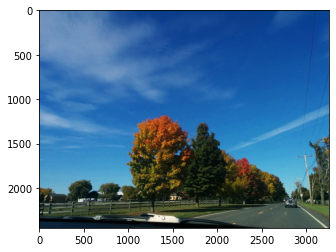

In [ ]:
## Let's see how we can use this in noise removal

# let us set some threshold for hue channel in blue range
blue_min = np.array([85,60,60], np.uint8)
blue_max = np.array([150,255,255], np.uint8)

upstate = cv.imread("upstate-ny.jpg")
# Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs. 
# In using this color model, a color is specified then white or black is added to easily make color adjustments. 
upstate_hsv = cv.cvtColor(upstate, cv.COLOR_BGR2HSV)

plt.imshow(cv.cvtColor(upstate_hsv, cv.COLOR_HSV2RGB))

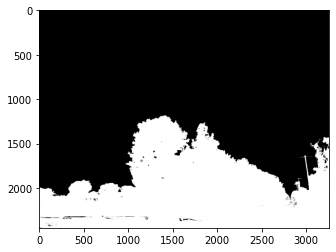

In [ ]:
mask_inverse = cv.inRange(upstate_hsv, blue_min, blue_max)
mask = cv.bitwise_not(mask_inverse)
plt.imshow(cv.cvtColor(mask, cv.COLOR_GRAY2RGB))

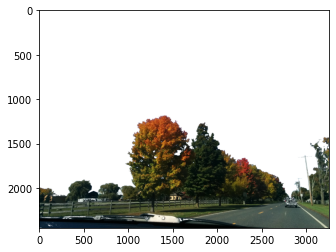

In [ ]:
# convert single channel mask back into 3 channels
mask_rgb = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv.addWeighted(masked_upstate, 1,  \
                                       cv.cvtColor(mask_inverse, cv.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv.cvtColor(masked_replace_white, cv.COLOR_BGR2RGB))

## **Segmentation**

### Gaussian Blur

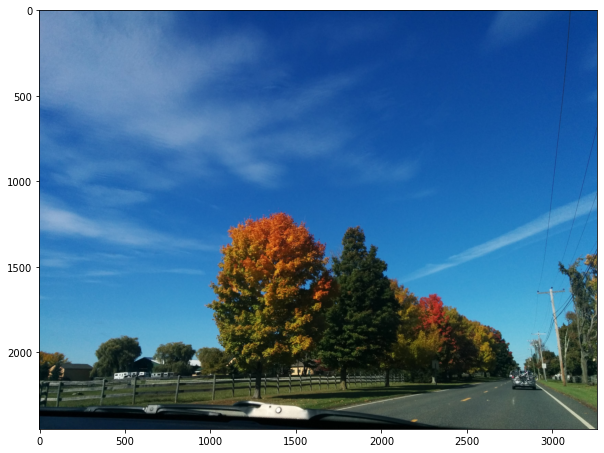

In [ ]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv.GaussianBlur(upstate, (5,5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_blur_small, cv.COLOR_BGR2RGB))

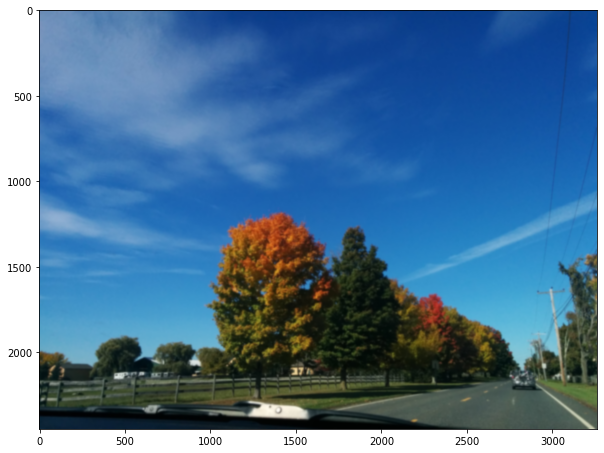

In [ ]:
img_blur_small = cv.GaussianBlur(upstate, (25,25), 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_blur_small, cv.COLOR_BGR2RGB))

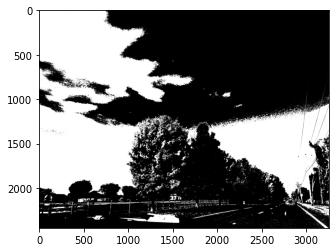

In [ ]:
# threshold on regular image
gray_img = cv.cvtColor(upstate, cv.COLOR_BGR2GRAY)
_, threshold_img = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
plt.imshow(cv.cvtColor(threshold_img, cv.COLOR_GRAY2BGR))

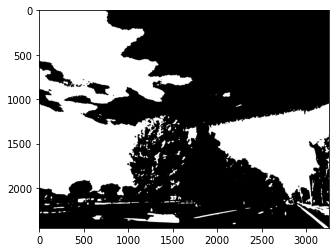

In [ ]:
# threshold on blurred image
gray_img = cv.cvtColor(img_blur_small, cv.COLOR_BGR2GRAY)
_, threshold_img = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
plt.imshow(cv.cvtColor(threshold_img, cv.COLOR_GRAY2BGR))

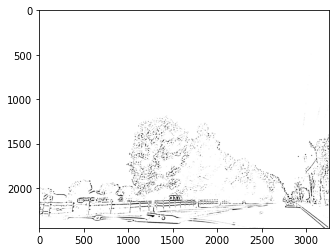

In [ ]:
# using adaptive threshold instead of global
adaptive_thresh = cv.adaptiveThreshold(gray_img, 255,\
                                         cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv.THRESH_BINARY,11,2)
plt.imshow(cv.cvtColor(adaptive_thresh, cv.COLOR_GRAY2RGB))

In [ ]:
# we can use this concept of blurring in the segmentation
uploaded = files.upload()

# uploading a file into colab working directory 
# file was downloaded from - https://raw.githubusercontent.com/dphi-official/Deep_Learning_Bootcamp/master/Digital%20Image%20Processing/images/coins.jpg

Saving coins.jpg to coins.jpg


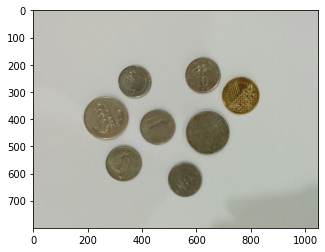

In [ ]:
coins = cv.imread('coins.jpg')
plt.imshow(cv.cvtColor(coins, cv.COLOR_BGR2RGB))

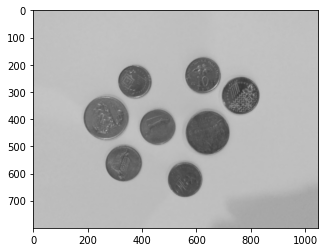

In [ ]:
# get binary image and apply Gaussian blur
coins_gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)
coins_preprocessed = cv.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(cv.cvtColor(coins_preprocessed, cv.COLOR_GRAY2RGB))

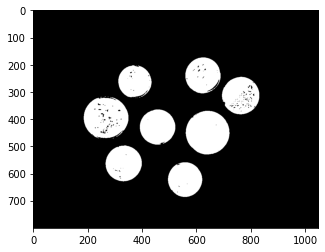

In [ ]:
_, coins_binary = cv.threshold(coins_preprocessed, 130, 255, cv.THRESH_BINARY)

# invert image to get coins
coins_binary = cv.bitwise_not(coins_binary)
plt.imshow(cv.cvtColor(coins_binary, cv.COLOR_GRAY2RGB))

### Morphology -> Erosion

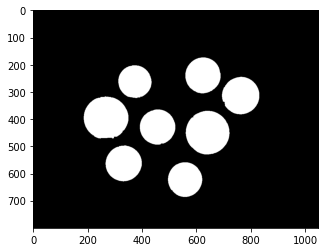

In [ ]:
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv.morphologyEx(coins_binary, cv.MORPH_CLOSE, morph_kernel)

plt.imshow(cv.cvtColor(coins_morph, cv.COLOR_GRAY2RGB))

### Contours

Number of coins:  8


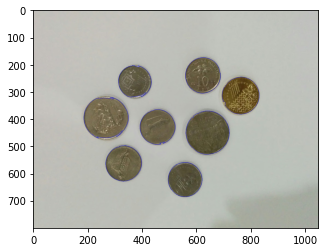

In [ ]:
# find contours
coin_contours, _ = cv.findContours(coins_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coin_contours if cv.contourArea(cnt) > min_coin_area]

# draw contours
cv.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv.cvtColor(coins_and_contours, cv.COLOR_BGR2RGB))

# print number of contours
print('Number of coins: ', len(large_contours))

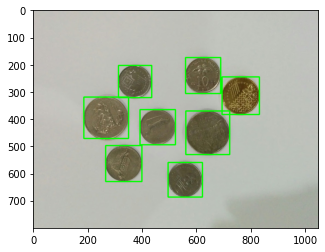

In [ ]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for i in large_contours:
    x, y, w, h = cv.boundingRect(i)
    cv.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv.cvtColor(bounding_img, cv.COLOR_BGR2RGB))

### Histogram - Equalization

In [ ]:
#Read Image in GrayScale by setting 0 in the arguments
img_gray = cv.imread("brad.jpg", 0)
height, width = img_gray.shape[:2]
N = height*width


In [ ]:
#Initialize intensity values with 256 zeroes
intensity_count = [0] * 256   
high_contrast = np.zeros(img_gray.shape)

In [ ]:
#Find pixels count for each intensity
for i in range(0,height):
  for j in range(0,width):
    intensity_count[img_gray[i][j]] += 1

In [ ]:
L = 256
intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])      
# Calculating Probability density function -> based on frequency/count
pdf_list = np.ceil(intensity_count*(L-1)/img.size)
# Calculating Cumulative distribution function 
cdf_list = pdf_list.cumsum()


In [ ]:
#Apply the new intensities in our new image
for y in range(0, height):
  for x in range(0, width): 
    high_contrast[y,x] = cdf_list[img_gray[y,x]]

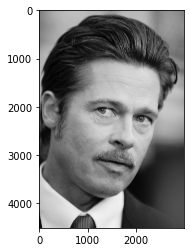

In [ ]:
# this is much sharper image
plt.imshow(high_contrast, cmap='gray')

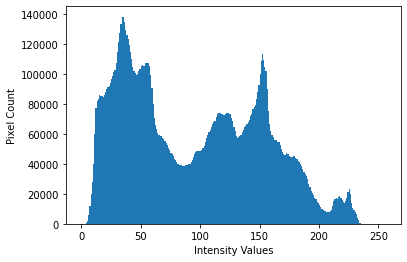

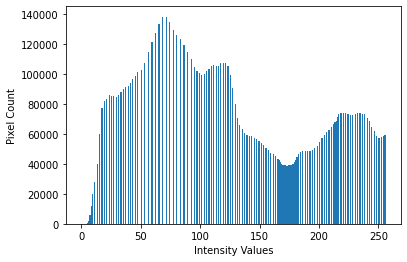

In [ ]:
plt.hist(img_gray.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

plt.hist(high_contrast.ravel(),256,[0,256])	
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

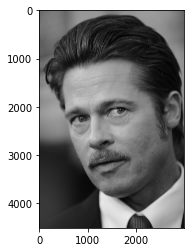

In [ ]:
# Horizontal flip

flip_img = cv.flip(img_gray, 1)
plt.imshow(flip_img, cmap='gray')

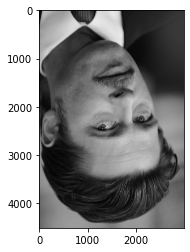

In [ ]:
# Vertical
flip_img = cv.flip(img_gray, 0)
plt.imshow(flip_img, cmap='gray')

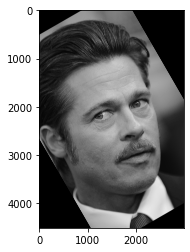

In [ ]:
h, w = img_gray.shape
M = cv.getRotationMatrix2D((int(w/2), int(h/2)), 30, 1)
rotated_img = cv.warpAffine(img_gray, M, (w, h))
plt.imshow(rotated_img, cmap='gray')

# Convolutional Neural Networks - Building CNN Classifiers

In [3]:
import tensorflow as tf

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import subprocess
import json
import requests
from tqdm import tqdm



We will build the following two deep learning CNN (Convolutional Neural Network) classifiers in this notebook.

    A simple CNN trained from scratch
    Fine-tuning a pre-trained VGG-19 CNN


## Load Dataset



In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f'Train_images.shape: {train_images.shape}, of {train_images.dtype}')
print(f'Test_images.shape: {test_images.shape}, of {test_images.dtype}')

4422102/4422102 [==============================] - 0s 0us/step
Train_images.shape: (60000, 28, 28), of uint8
Test_images.shape: (10000, 28, 28), of uint8


In [5]:
train_images.shape

(60000, 28, 28)


## 1.Training a simple CNN Classifier from Scratch

### Reshaping Image Data for Modeling

In [6]:
# reshape for feeding into the model
train_images_gr = train_images.reshape(train_images.shape[0], 28,28,1)
test_images_gr = test_images.reshape(test_images.shape[0], 28,28,1)

print(f'Train_images.shape: {train_images_gr.shape}, of {train_images_gr.dtype}')
print(f'Test_images.shape: {test_images_gr.shape}, of {test_images_gr.dtype}')

Train_images.shape: (60000, 28, 28, 1), of uint8
Test_images.shape: (10000, 28, 28, 1), of uint8


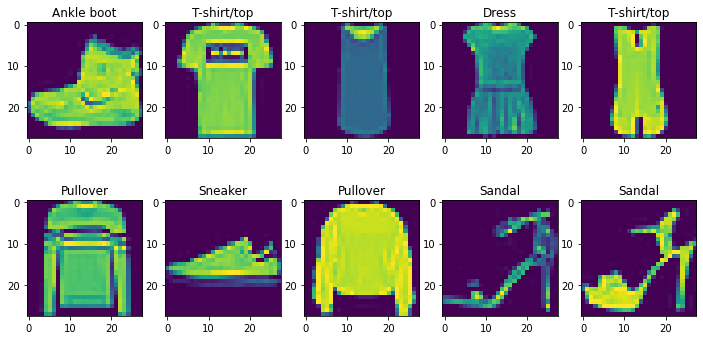

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(12,6))
c = 0
for i in range(10):
    idx = i // 5
    idy = i % 5 
    ax[idx, idy].imshow(train_images_gr[i].reshape(28,28))
    ax[idx, idy].set_title(class_names[train_labels[i]])

### Build CNN Model Architecture

In [8]:
# define input shape
INPUT_SHAPE = (28, 28, 1)

# define sequential model
model = tf.keras.Sequential()

# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#add flatten layer
model.add(tf.keras.layers.Flatten())

#add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

#add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

### Model Training

In [9]:
EPOCHS = 100

train_images_scaled = train_images_gr / 255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

history = model.fit(train_images_scaled, train_labels, batch_size=32, epochs=EPOCHS, callbacks=[es_callback], validation_split=0.1, verbose=1)

Epoch 1/100
1688/1688 [==============================] - 53s 30ms/step - loss: 0.5417 - accuracy: 0.7966 - val_loss: 0.3606 - val_accuracy: 0.8610
Epoch 2/100
1688/1688 [==============================] - 71s 42ms/step - loss: 0.3543 - accuracy: 0.8702 - val_loss: 0.3033 - val_accuracy: 0.8890
Epoch 3/100
1688/1688 [==============================] - 71s 42ms/step - loss: 0.3039 - accuracy: 0.8887 - val_loss: 0.2991 - val_accuracy: 0.8908
Epoch 4/100
1688/1688 [==============================] - 57s 33ms/step - loss: 0.2764 - accuracy: 0.8966 - val_loss: 0.2760 - val_accuracy: 0.9002
Epoch 5/100
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2544 - accuracy: 0.9053 - val_loss: 0.2660 - val_accuracy: 0.9032
Epoch 6/100
1688/1688 [==============================] - 41s 24ms/step - loss: 0.2361 - accuracy: 0.9132 - val_loss: 0.2533 - val_accuracy: 0.9063
Epoch 7/100
1688/1688 [==============================] - 40s 24ms/step - loss: 0.2186 - accuracy: 0.9192 - val_loss: 0

### Plot Learning Curves

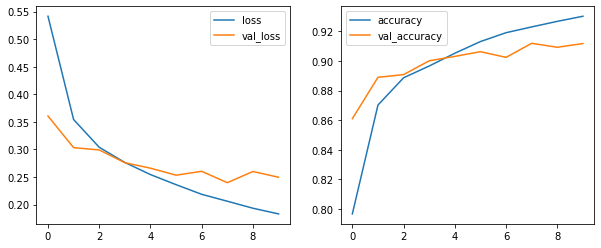

In [10]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10,4))
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1])


### Evaluate Model Performance on Test Data


In [11]:
test_images_scaled = test_images_gr / 255.0
predictions = model.predict(test_images_scaled)
predictions[:5]

313/313 [==============================] - 3s 9ms/step


array([[4.2299527e-13, 1.8706647e-13, 3.1407653e-14, 6.3337627e-13,
        3.4109483e-13, 5.1910781e-08, 7.7806224e-13, 4.1653534e-06,
        2.7929869e-13, 9.9999577e-01],
       [3.2315288e-06, 7.4127302e-11, 9.9985504e-01, 2.5089946e-07,
        7.0236027e-05, 4.8181095e-12, 7.1096350e-05, 7.5149392e-12,
        3.5305442e-07, 2.7185762e-12],
       [1.4229681e-15, 9.9999994e-01, 7.9543797e-15, 1.2560321e-13,
        7.5533140e-14, 6.9598946e-19, 3.0105641e-14, 4.4820681e-21,
        1.2428629e-17, 8.1944079e-20],
       [1.2792181e-17, 9.9999994e-01, 9.8576925e-18, 9.4787629e-15,
        4.4420264e-17, 2.9582976e-22, 1.1720470e-16, 1.8959563e-25,
        1.4206371e-21, 3.1473004e-23],
       [7.8165188e-02, 1.0391298e-04, 2.1848314e-02, 4.7366535e-03,
        2.6802398e-02, 7.1111492e-05, 8.6788774e-01, 1.4493488e-05,
        3.3848963e-04, 3.1711952e-05]], dtype=float32)

In [12]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels[:5]

array([9, 2, 1, 1, 6])

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_labels, pred_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, pred_labels), index=class_names, columns=class_names)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.85      0.88      0.87      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.84      0.86      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,894,0,12,16,3,1,68,0,6,0
Trouser,1,973,0,16,2,0,5,0,3,0
Pullover,15,0,882,9,42,0,52,0,0,0
Dress,25,1,10,902,38,0,23,0,1,0
Coat,0,1,55,15,859,0,68,0,2,0
Sandal,0,0,0,0,0,981,0,9,0,10
Shirt,136,0,75,23,74,0,679,0,13,0
Sneaker,0,0,0,0,0,15,0,946,0,39
Bag,1,0,5,3,2,3,3,2,981,0
Ankle boot,0,0,0,0,0,4,1,17,0,978


In [14]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [15]:
test_image_idxs = [0, 23, 28]
test_labels[test_image_idxs] # here this 3 are representing ankle boots...


array([9, 9, 9], dtype=uint8)

In [16]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 19ms/step


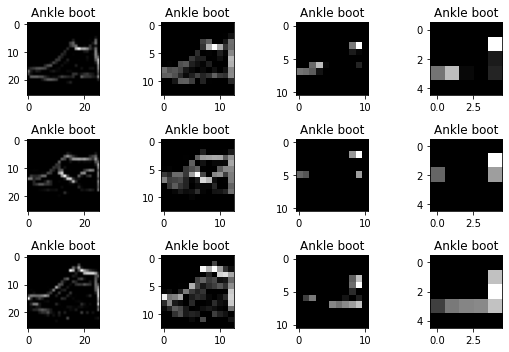

In [17]:
f, ax = plt.subplots(3,4, figsize=(8,5))

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 13

for x in range (0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='binary_r')
  ax[0,x].grid(False)
  ax[0,x].set_title(class_names[test_labels[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  ax[1,x].grid(False)
  ax[1,x].set_title(class_names[test_labels[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  ax[2,x].grid(False)
  ax[2,x].set_title(class_names[test_labels[THIRD_IMAGE]])
  plt.tight_layout()



1/1 [==============================] - 0s 24ms/step


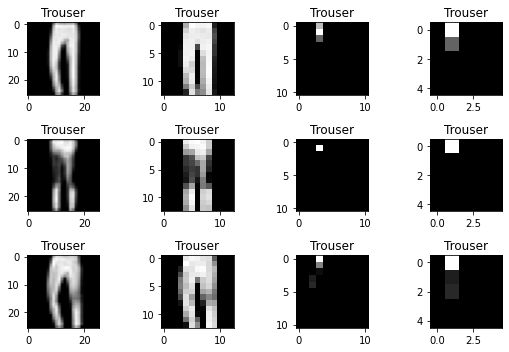

In [18]:
f, ax = plt.subplots(3,4, figsize=(8,5))

FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 3

for x in range (0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='binary_r')
  ax[0,x].grid(False)
  ax[0,x].set_title(class_names[test_labels[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  ax[1,x].grid(False)
  ax[1,x].set_title(class_names[test_labels[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  ax[2,x].grid(False)
  ax[2,x].set_title(class_names[test_labels[THIRD_IMAGE]])
  plt.tight_layout()


## 2. Fine-tuning a pre-trained VGG-19 CNN Model

Model Architecture Details
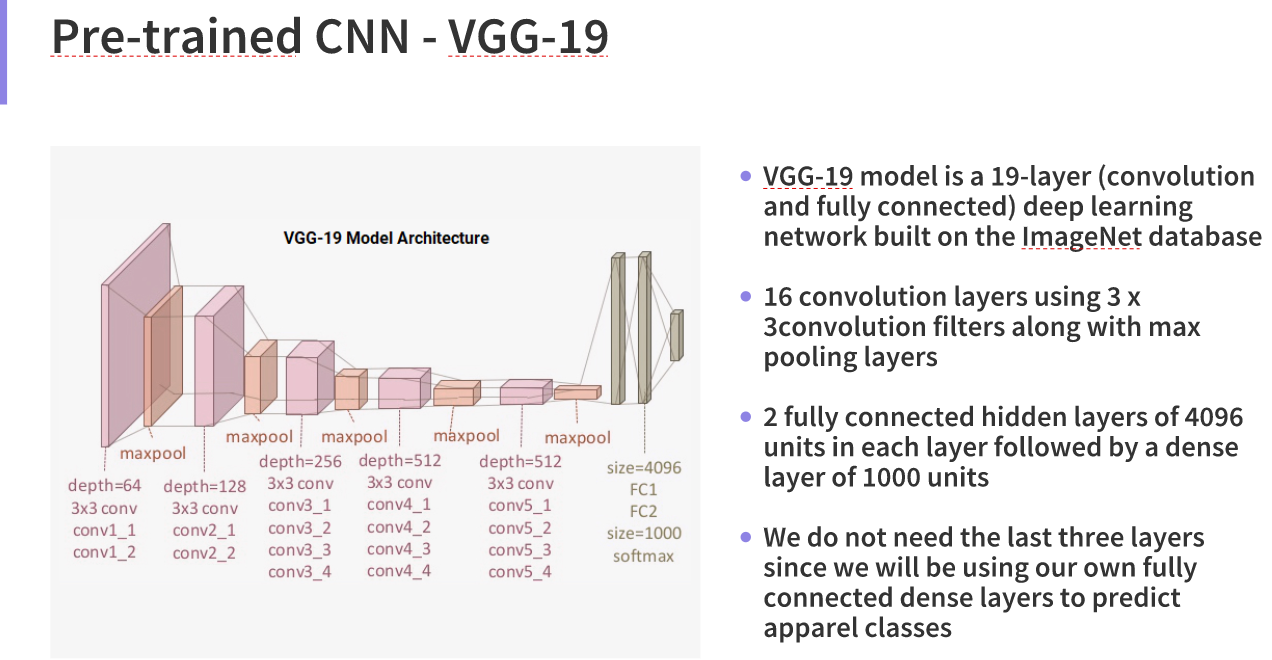

### Reshaping Image Data for Modeling 

In [19]:
train_images_3ch = np.stack([train_images]*3, axis=-1)
test_images_3ch = np.stack([test_images]*3, axis=-1)

print(f'Train_images.shape: {train_images_3ch.shape}, of {train_images_3ch.dtype}')
print(f'Test_images.shape: {test_images_3ch.shape}, of {test_images_3ch.dtype}')

Train_images.shape: (60000, 28, 28, 3), of uint8
Test_images.shape: (10000, 28, 28, 3), of uint8


### Resizing Image Data for Modeling

The minimum image size expected by the VGG model is 32x32 so we need to resize our images

In [20]:
def resize_image_array(img, img_size_dims):
  img = cv2.resize(img, dsize=img_size_dims, interpolation=cv2.INTER_CUBIC)
  img = np.array(img, dtype= np.float32)
  return img
  


In [21]:
%%time

IMG_DIMS = (32,32)

train_images_3ch = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in train_images_3ch])
test_images_3ch = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in test_images_3ch])

print(f'Train_images.shape: {train_images_3ch.shape}, of {train_images_3ch.dtype}')
print(f'Test_images.shape: {test_images_3ch.shape}, of {test_images_3ch.dtype}')

Train_images.shape: (60000, 32, 32, 3), of float32
Test_images.shape: (10000, 32, 32, 3), of float32
CPU times: user 1.95 s, sys: 1.03 s, total: 2.98 s
Wall time: 3.06 s


### Build CNN Model Architecture

In [22]:
INPUT_SHAPE = (32, 32, 3)

vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
vgg_layers.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              


### Set layers to trainable to enable fine-tuning


In [23]:
for layer in vgg_layers.layers:
  layer.trainable = True

for layer in vgg_layers.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f02b0f5f110> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02ae132790> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02ae132950> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f02ae1329d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02b0f35810> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02b0ef23d0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f02ae0dcb10> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02b0f93ed0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02b0f9a150> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02ae19a1d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02ae184e90> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f02ae441350> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02b11e5650> True
<keras.layers.convolutional.conv2d.


### Build CNN model on top of VGG19


In [24]:
model = tf.keras.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#compile model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [25]:
  EPOCHS = 100

train_images_3chscaled = train_images_3ch / 255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

history = model.fit(train_images_3ch, train_labels,  epochs=EPOCHS, verbose=1, validation_split=0.1, callbacks=[es_callback], batch_size=32)

Epoch 1/100
 956/1688 [===============>..............] - ETA: 55:33 - loss: 1.1067 - accuracy: 0.6519

KeyboardInterrupt: ignored

### Plot Learning Curves


In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10,4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1])

### Evaluate Model Performance on Test Data


In [ ]:
test_images_3ch_scaled = test_images_3ch / 255.
predictions = model.predict(test_images_3ch_scaled)
predictions[:5]

In [ ]:
predictions_labels = np.argmax(predictions, axis=1)
predictions_labels[:5]

In [ ]:
print(classification_report(test_labels, predictions_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, predictions_labels), index_names=class_names, column_names=class_names)